In [111]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
# ESS嗜睡問卷調查
data_ESS = pd.read_csv('ESS.csv')
data_ESS = data_ESS.drop(data_ESS.columns[[0, 1, 4, 5]], axis = 1)
data_ESS.columns.values[0] = "A_before"
data_ESS.columns.values[1] = "A_after"
data_ESS.columns.values[2] = "C_before"
data_ESS.columns.values[3] = "C_after"

In [113]:
data_ESS

,A_before,A_after,C_before,C_after
0,8,1,8,5
1,7,4,8,4
2,0,6,4,2
3,7,3,7,8
4,13,11,6,3


In [114]:
A_before= np.array(data_ESS['A_before'])
A_after= np.array(data_ESS['A_after'])
C_before= np.array(data_ESS['C_before'])
C_after= np.array(data_ESS['C_after'])

In [115]:
from scipy import stats

In [116]:
# Paired T-test
result_Ap= stats.ttest_rel(A_before, A_after)
result_Cp= stats.ttest_rel(C_before, C_after)

print('Paired T-test Results for A')
print(result_Ap)
print('')
print('Paired T-test Results for C')
print(result_Cp)

Paired T-test Results for A
TtestResult(statistic=0.9225312080288851, pvalue=0.40846070846523685, df=4)

Paired T-test Results for C
TtestResult(statistic=2.5574480523640246, pvalue=0.06280761100070112, df=4)


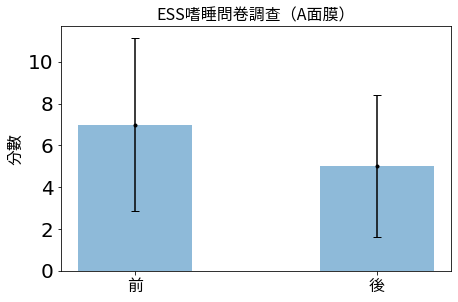

In [117]:
# Plot the bar chart 
from matplotlib.font_manager import FontProperties
from matplotlib.font_manager import FontProperties as font

font1 = font(fname= "/Users/jielinglee/Downloads/TaipeiSansTCBeta-Regular.ttf")
plt.rcParams['font.size']=20


objects = ('前','後')
y= [np.mean(A_before), np.mean(A_after)]

w = 0.4
y_pos = (w/5,w*1.8)

yerr= [np.std(A_before), np.std(A_after)]

plt.figure(figsize=(7, 4.5))
plt.title('ESS嗜睡問卷調查（A面膜）', fontproperties=font1)
plt.bar(y_pos, y, width = 0.3, align='center', alpha=0.5)
plt.errorbar(y_pos, y, yerr=yerr, fmt=".", color="black", capsize=4)
plt.ylabel('分數', fontproperties=font1)
plt.xticks(y_pos, objects, fontproperties=font1)
plt.savefig("ESS.png")
plt.show()


In [118]:
# Pittsburge 

In [119]:
data_Pit = np.loadtxt('Pittsburge.csv', delimiter=',', skiprows= 1, dtype= str, unpack= True)

In [120]:
# 匹茲堡睡眠品質量表

item= ['睡眠品質', '睡眠潛伏期', '睡眠時數', '睡眠效率', '睡眠困擾', '安眠藥物使用', '日見活動失能', '總分'] 


def result(item, no, Ab, Aa, Cb, Ca):
    A_B= np.zeros((no, 5))
    A_A= np.zeros((no, 5))
    C_B= np.zeros((no, 5))
    C_A= np.zeros((no, 5))
    n=0
    for i in range(no):
        A_before2_1= Ab[0+n:5+n].astype(float)
        A_after2_1= Aa[0+n:5+n].astype(float)
        C_before2_1= Cb[0+n:5+n].astype(float)
        C_after2_1= Ca[0+n:5+n].astype(float)
    
        A_B[i, :]= A_before2_1
        A_A[i, :]= A_after2_1
        C_B[i, :]= C_before2_1
        C_A[i, :]= C_after2_1
        
        
        print(item[i])
        print('Paired T-test Results for A')
        result_Ap= stats.ttest_rel(A_before2_1, A_after2_1)
        print(result_Ap)
        print('Paired T-test Results for C')
        result_Cp= stats.ttest_rel(C_before2_1, C_after2_1)
        print(result_Cp)
        print('')

        n+= 7
    return A_B, A_A, C_B, C_A

In [121]:
A_B, A_A, C_B, C_A= result(item[:4], 4, data_Pit[3], data_Pit[4], data_Pit[7], data_Pit[8])
A_B2, A_A2, C_B2, C_A2= result(item[4:], 4, data_Pit[12], data_Pit[13], data_Pit[16], data_Pit[17])

睡眠品質
Paired T-test Results for A
TtestResult(statistic=-1.632993161855452, pvalue=0.17780780835622126, df=4)
Paired T-test Results for C
TtestResult(statistic=nan, pvalue=nan, df=4)

睡眠潛伏期
Paired T-test Results for A
TtestResult(statistic=-0.9999999999999999, pvalue=0.373900966300059, df=4)
Paired T-test Results for C
TtestResult(statistic=-0.9999999999999999, pvalue=0.373900966300059, df=4)

睡眠時數
Paired T-test Results for A
TtestResult(statistic=-0.9999999999999999, pvalue=0.373900966300059, df=4)
Paired T-test Results for C
TtestResult(statistic=0.5345224838248488, pvalue=0.6213082950374971, df=4)

睡眠效率
Paired T-test Results for A
TtestResult(statistic=-0.9999999999999999, pvalue=0.373900966300059, df=4)
Paired T-test Results for C
TtestResult(statistic=1.3719886811400706, pvalue=0.24198153056802083, df=4)

睡眠困擾
Paired T-test Results for A
TtestResult(statistic=-1.632993161855452, pvalue=0.17780780835622126, df=4)
Paired T-test Results for C
TtestResult(statistic=0.0, pvalue=1.0, df=

In [122]:

def plot_total(y, text, save):
    font1 = font(fname= "/Users/jielinglee/Downloads/TaipeiSansTCBeta-Regular.ttf")
    plt.rcParams['font.size']=20

    objects = ('前','後')
    
 
    plt.figure(figsize=(8, 4.5))
    y_pos = (0.5, 2.5)

    plt.title(text, fontproperties=font1)
    plt.plot(y_pos, y, 'o-', color='red', alpha= 0.5)
    plt.boxplot([y[0], y[1]], positions= y_pos, sym='')
    plt.ylabel('分數', fontproperties=font1)
    plt.xlim(0,3)
    plt.xticks(y_pos, objects, fontproperties=font1)
    plt.savefig(save+".png")
    plt.show()

    
    
    
#y1= [np.append(np.sum(A_B, axis=1), np.sum(A_B2, axis=1))[:6], np.append(np.sum(A_A, axis=1), np.sum(A_A2, axis=1))[:6]]

#plot_total(y1, '匹茲堡睡眠品質量表（A面膜)', "Total_Pitt_A")





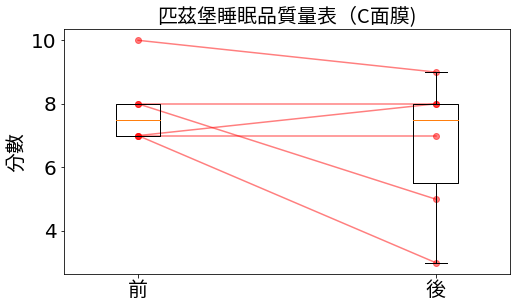

In [123]:
y2= [np.append(np.sum(C_B, axis=1), np.sum(C_B2, axis=1))[:6], np.append(np.sum(C_A, axis=1), np.sum(C_A2, axis=1))[:6]]

plot_total(y2, '匹茲堡睡眠品質量表（C面膜)', "Total_Pitt_C")


In [124]:
def plot1(before, after, text, survey, ab):
    font1 = font(fname= "/Users/jielinglee/Downloads/TaipeiSansTCBeta-Regular.ttf")
    plt.rcParams['font.size']=16

    objects = ('前','後')
    y= [np.mean(before), np.mean(after)]

    w = 0.4
    y_pos = (w/5,w*1.8)

    yerr= [np.std(before), np.std(after)]

    plt.figure(figsize=(7, 4.5))
    plt.title(survey+'（'+ text +'面膜）-'+item[i], fontproperties=font1)
    plt.bar(y_pos, y, width = 0.3, align='center', alpha=0.5)
    plt.errorbar(y_pos, y, yerr=yerr, fmt=".", color="black", capsize=4)
    plt.ylabel('分數', fontproperties=font1)
    plt.xticks(y_pos, objects, fontproperties=font1)
    plt.savefig(ab +str(i)+ text+".png")
    plt.show()

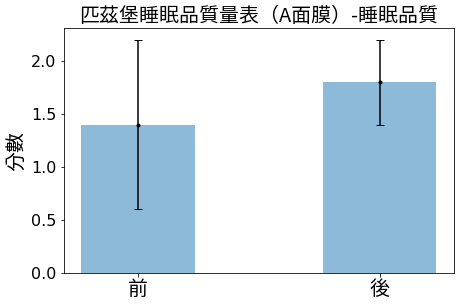

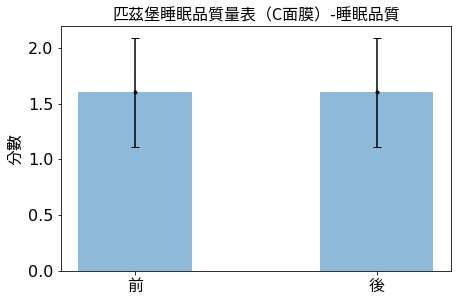

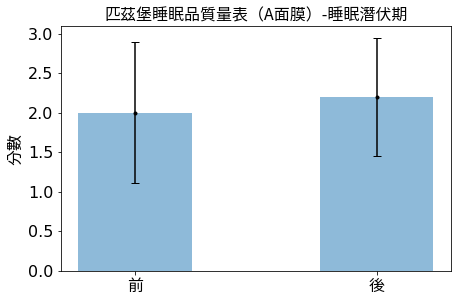

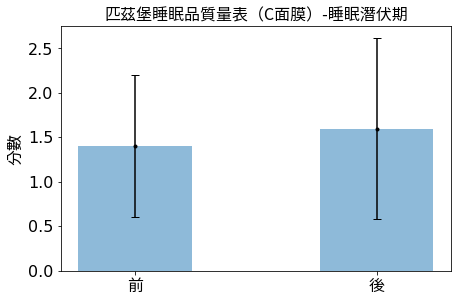

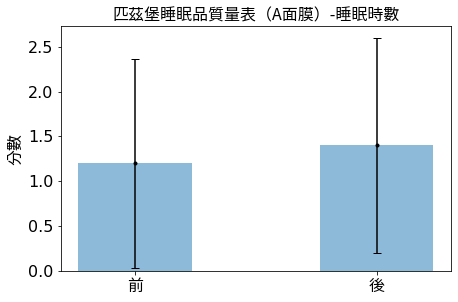

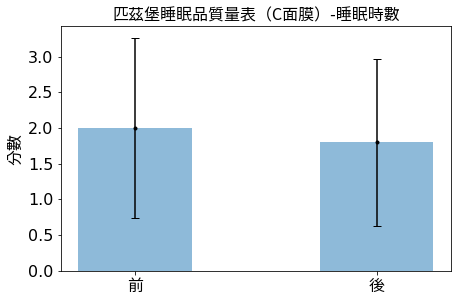

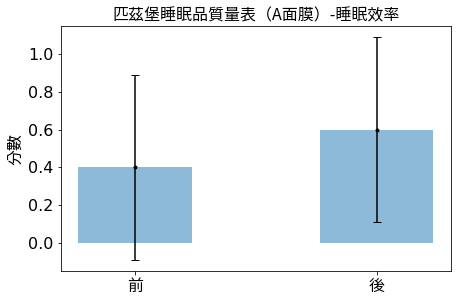

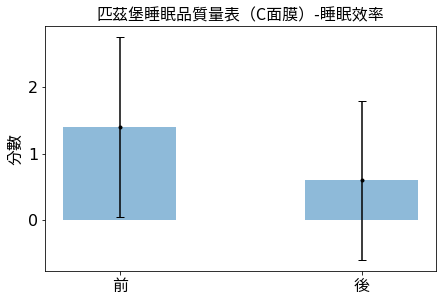

In [125]:
for i in range(4):
    plot1(A_B[i], A_A[i], "A", "匹茲堡睡眠品質量表", "Pitts1")
    plot1(C_B[i], C_A[i], "C", "匹茲堡睡眠品質量表", "Pitts1")

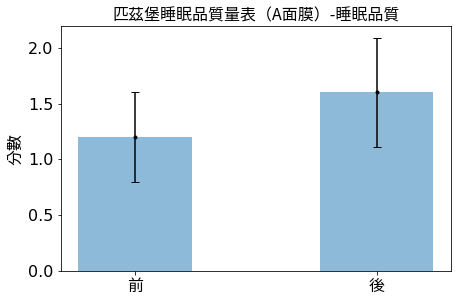

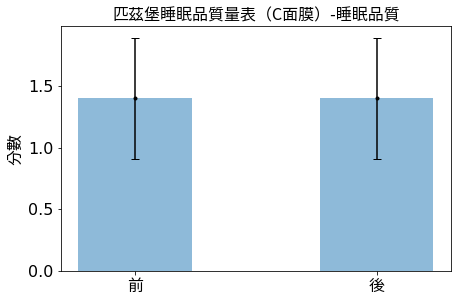

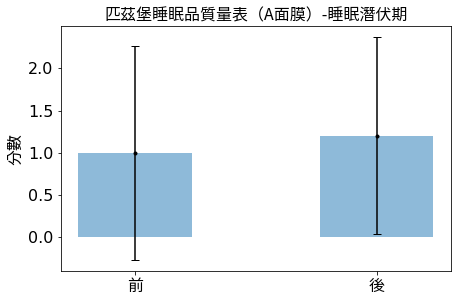

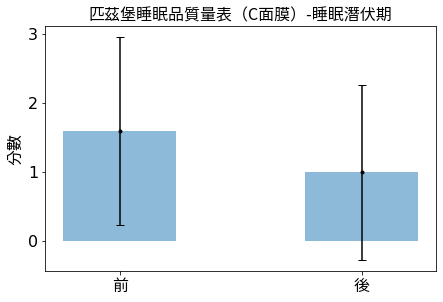

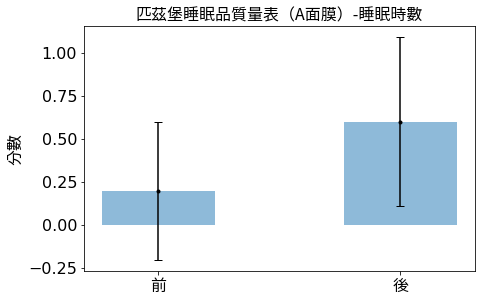

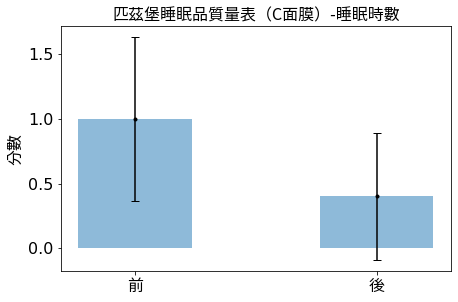

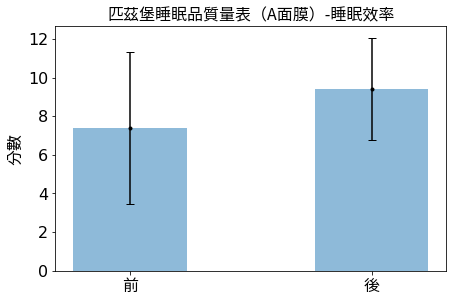

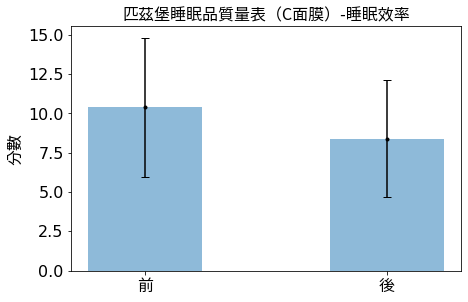

In [126]:
for i in range(4):
    plot1(A_B2[i], A_A2[i], "A", "匹茲堡睡眠品質量表", "Pitts2")
    plot1(C_B2[i], C_A2[i], "C", "匹茲堡睡眠品質量表", "Pitts2")

In [127]:
# SF-36
data_SF36= np.loadtxt('SF36.csv', delimiter=',', skiprows= 1, dtype= str, unpack= True)

In [128]:
item= ['生理功能', '生理職能', '軀體疼痛', '總體健康', '軀體健康總測量', '總分', '活力', '社會功能', '情感職能', '精神健康', '心理健康總測量']

A_B3, A_A3, C_B3, C_A3= result(item[:6], 6, data_SF36[3], data_SF36[4], data_SF36[7], data_SF36[8])
A_B4, A_A4, C_B4, C_A4= result(item[6:], 5, data_SF36[12], data_SF36[13], data_SF36[16], data_SF36[17])

生理功能
Paired T-test Results for A
TtestResult(statistic=-2.4494897427831783, pvalue=0.07048399691021993, df=4)
Paired T-test Results for C
TtestResult(statistic=-1.0, pvalue=0.373900966300059, df=4)

生理職能
Paired T-test Results for A
TtestResult(statistic=1.0, pvalue=0.373900966300059, df=4)
Paired T-test Results for C
TtestResult(statistic=1.0, pvalue=0.373900966300059, df=4)

軀體疼痛
Paired T-test Results for A
TtestResult(statistic=0.3015113445777636, pvalue=0.778049548900021, df=4)
Paired T-test Results for C
TtestResult(statistic=-2.4494897427831783, pvalue=0.07048399691021993, df=4)

總體健康
Paired T-test Results for A
TtestResult(statistic=3.1378581622109447, pvalue=0.034919706674539044, df=4)
Paired T-test Results for C
TtestResult(statistic=0.7385489458759964, pvalue=0.5011693674201637, df=4)

軀體健康總測量
Paired T-test Results for A
TtestResult(statistic=1.299688112275091, pvalue=0.2635485371875481, df=4)
Paired T-test Results for C
TtestResult(statistic=0.04194061219900216, pvalue=0.9685

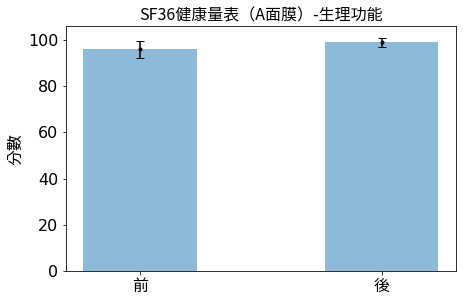

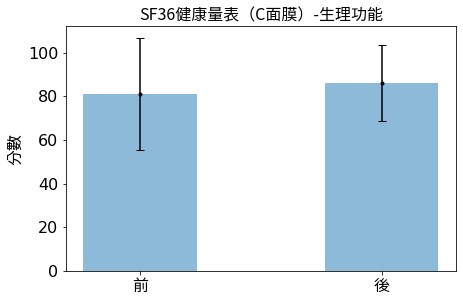

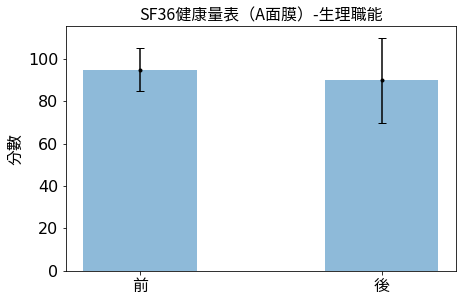

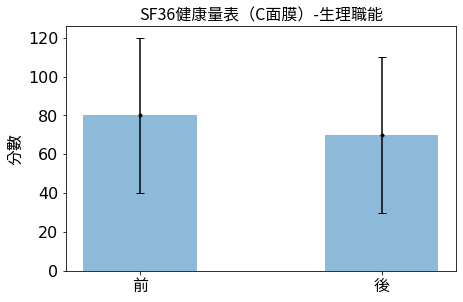

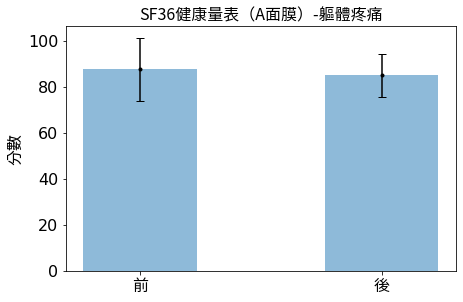

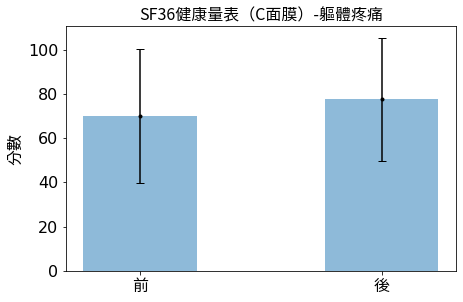

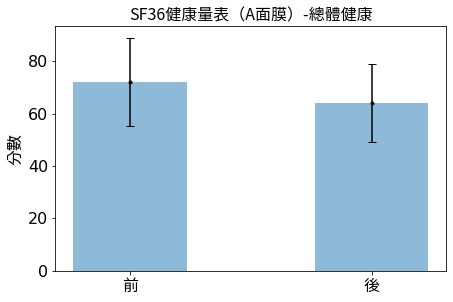

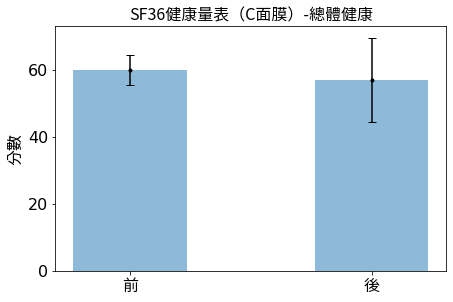

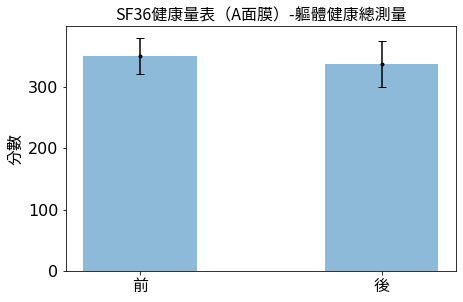

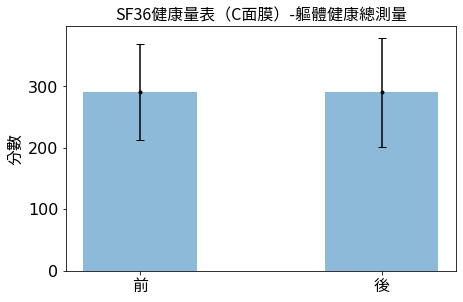

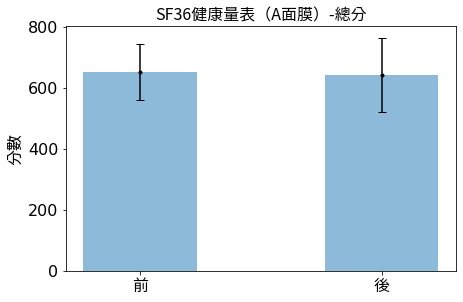

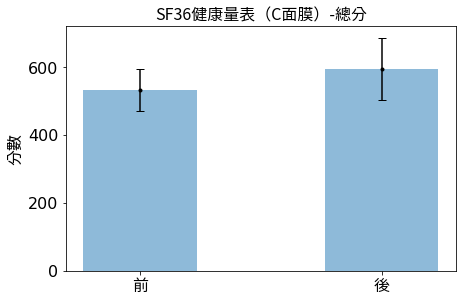

In [129]:
for i in range(6):
    plot1(A_B3[i], A_A3[i], "A", "SF36健康量表", "SF36-1")
    plot1(C_B3[i], C_A3[i], "C", "SF36健康量表", "SF36-1")

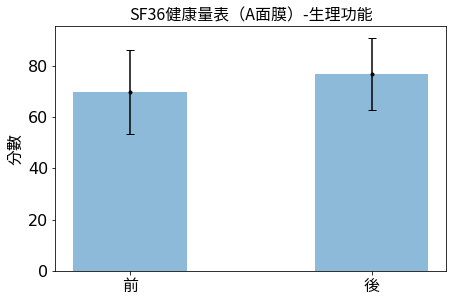

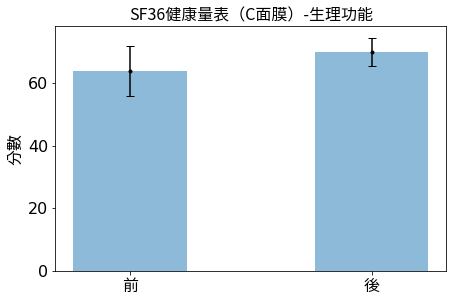

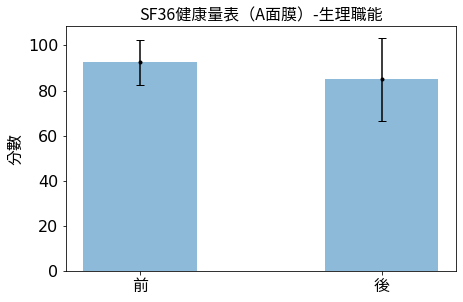

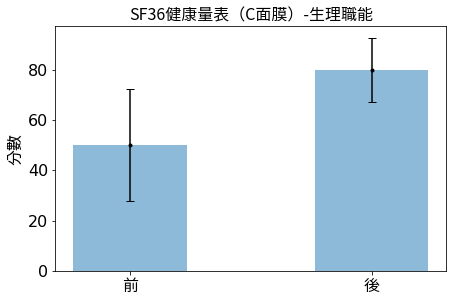

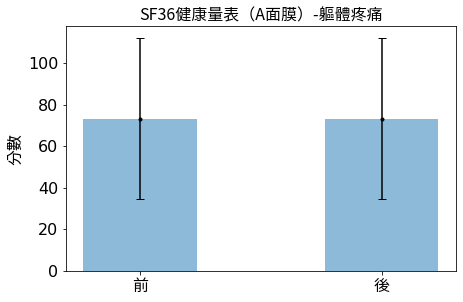

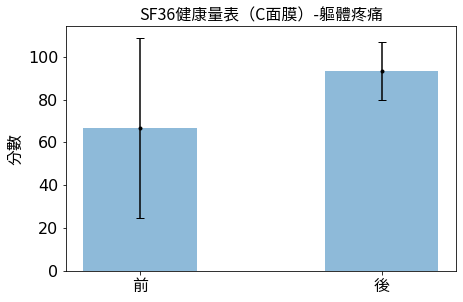

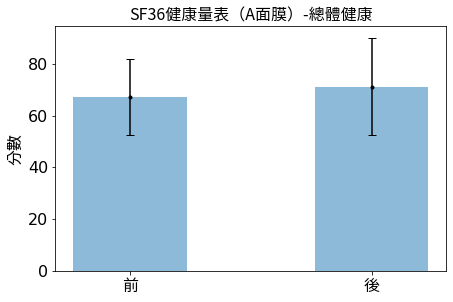

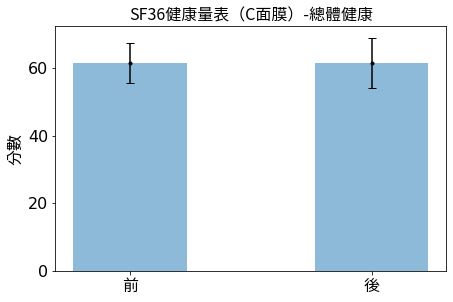

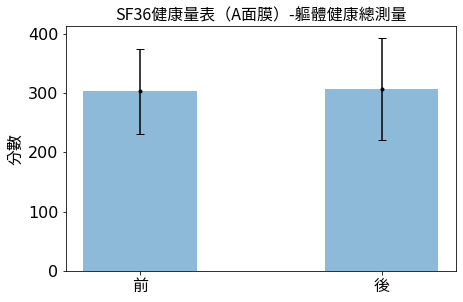

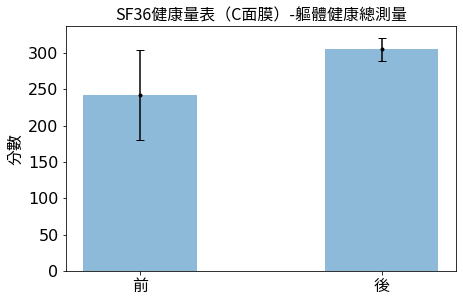

In [130]:
for i in range(5):
    plot1(A_B4[i], A_A4[i], "A", "SF36健康量表", "SF36-2")
    plot1(C_B4[i], C_A4[i], "C", "SF36健康量表", "SF36-2")

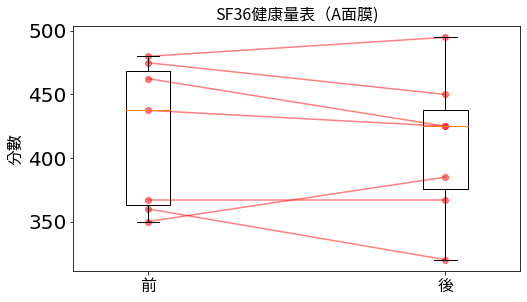

In [131]:
y2= [np.append(np.sum(A_B3, axis=1), np.sum(A_B4, axis=1))[[0,1,2,3,6,7,8]], np.append(np.sum(A_A3, axis=1), np.sum(A_A4, axis=1))[[0,1,2,3,6,7,8]]]

plot_total(y2, 'SF36健康量表（A面膜)', "Total_SF36_A")


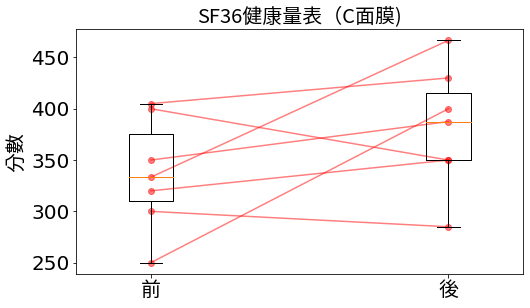

In [132]:
y3= [np.append(np.sum(C_B3, axis=1), np.sum(C_B4, axis=1))[[0,1,2,3,6,7,8]], np.append(np.sum(C_A3, axis=1), np.sum(C_A4, axis=1))[[0,1,2,3,6,7,8]]]

plot_total(y3, 'SF36健康量表（C面膜)', "Total_SF36_C")

In [134]:
# HRV 
data_HRV = np.loadtxt('HRV-2.csv', delimiter=',', skiprows= 1, dtype= str, unpack= True)

In [135]:
def result2(item, no, t1, t2, Ab, Aa, Cb, Ca, A):
    A_B= np.zeros((no, A[0]))
    A_A= np.zeros((no, A[1]))
    C_B= np.zeros((no, A[2]))
    C_A= np.zeros((no, A[3]))
    n=0
    for i in range(no):
        A_before2_1= Ab[0+n:t1+n].astype(float)
        A_after2_1= Aa[0+n:t1+n].astype(float)
        C_before2_1= Cb[0+n:t2+n].astype(float)
        C_after2_1= Ca[0+n:t2+n].astype(float)
        

        A_B[i, :]= A_before2_1
        A_A[i, :]= A_after2_1
        C_B[i, :]= C_before2_1
        C_A[i, :]= C_after2_1

        print(item[i])
        print('第一次： Paired T-test Results')
        result_Ap= stats.ttest_rel(A_before2_1, A_after2_1)
        print(result_Ap)
        print('第二次： Paired T-test Results')
        result_Cp= stats.ttest_rel(C_before2_1, C_after2_1)
        print(result_Cp)
        print('')

        n+= 8
    return A_B, A_A, C_B, C_A

In [136]:
def plot2(before, after, objects, unit, text, survey, ab):
    font1 = font(fname= "/Users/jielinglee/Downloads/TaipeiSansTCBeta-Regular.ttf")
    plt.rcParams['font.size']=16

    y= [np.mean(before), np.mean(after)]

    w = 0.4
    y_pos = (w/5,w*1.8)

    yerr= [np.std(before), np.std(after)]

    plt.figure(figsize=(7, 4.5))
    plt.title(survey+'（'+ text +'面膜）', fontproperties=font1)
    plt.bar(y_pos, y, width = 0.3, align='center', alpha=0.5)
    plt.errorbar(y_pos, y, yerr=yerr, fmt=".", color="black", capsize=4)
    plt.ylabel(unit, fontproperties=font1)
    plt.xticks(y_pos, objects, fontproperties=font1)
    plt.savefig(ab +str(i)+ text+".png")
    plt.show()

In [137]:
item2= ['SDNN', 'RMSSD', 'ANS', 'TP', 'Balance', 'SYM(調整)', 'VAG(調整)', 'ANS(調整)'] 
unit= ['SDNN(ms)', 'RMSSD(ms)', 'ANS(歲)', 'Total Power($ms^2$)', 'Balance', 'SYM(調整)', 'VAG(調整)', 'ANS(調整)'] 

#5, 5, 5, 5
print('A面膜')
print('')
print('比較前和中')
A_B1_1, A_M1_1, A_B2_1, A_M2_1= result2(item2, 8, 5, 5, data_HRV[3][2:], data_HRV[4][2:], data_HRV[7][2:], data_HRV[8][2:], [5,5,5,5])
print('')
print('比較中和後')
A_M1_2, A_A1_2, A_M2_2, A_A2_2= result2(item2, 8, 5, 5, data_HRV[4][2:], data_HRV[5][2:], data_HRV[8][2:], data_HRV[9][2:], [5,5,5,5])
print('')
print('比較前和後')
A_B1_3, A_A1_3, A_B2_3, A_A2_3= result2(item2, 8, 5, 5, data_HRV[3][2:], data_HRV[5][2:], data_HRV[7][2:], data_HRV[9][2:], [5,5,5,5])

A面膜

比較前和中
SDNN
第一次： Paired T-test Results
TtestResult(statistic=-0.7499252835925282, pvalue=0.4949997638093496, df=4)
第二次： Paired T-test Results
TtestResult(statistic=-1.5581746108922154, pvalue=0.19419227685151966, df=4)

RMSSD
第一次： Paired T-test Results
TtestResult(statistic=-1.0560337936221027, pvalue=0.3505129281201349, df=4)
第二次： Paired T-test Results
TtestResult(statistic=-1.0886621079036347, pvalue=0.33750185654036463, df=4)

ANS
第一次： Paired T-test Results
TtestResult(statistic=-0.36740522604809095, pvalue=0.7319302630201028, df=4)
第二次： Paired T-test Results
TtestResult(statistic=-0.9464534651013435, pvalue=0.39750946101884815, df=4)

TP
第一次： Paired T-test Results
TtestResult(statistic=-0.4097673684513607, pvalue=0.7029716104787925, df=4)
第二次： Paired T-test Results
TtestResult(statistic=-1.239363984428705, pvalue=0.2829585643452795, df=4)

Balance
第一次： Paired T-test Results
TtestResult(statistic=1.2555656114510325, pvalue=0.2776149454990729, df=4)
第二次： Paired T-test Results
Tte

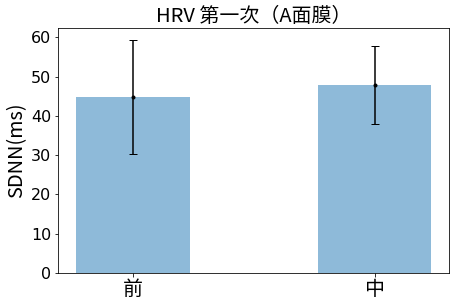

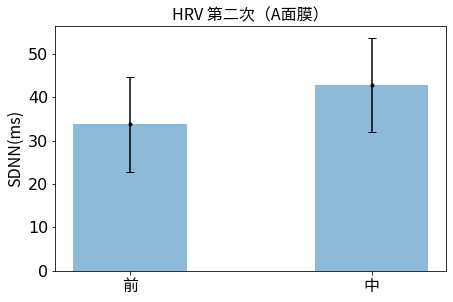

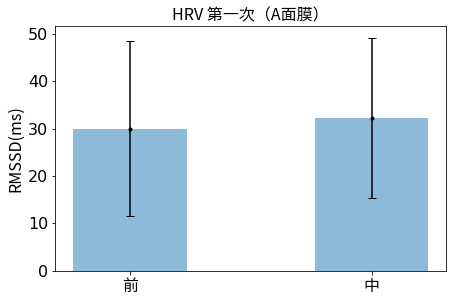

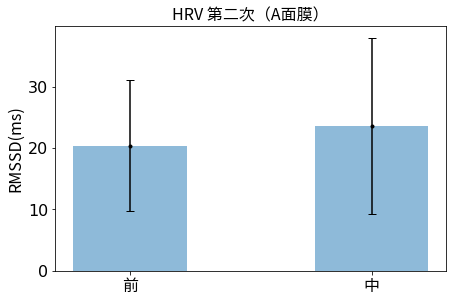

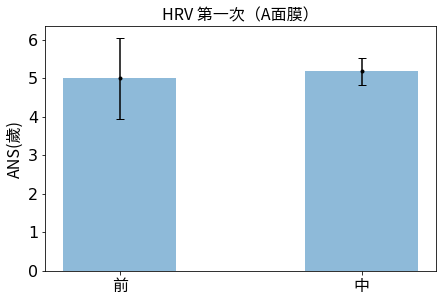

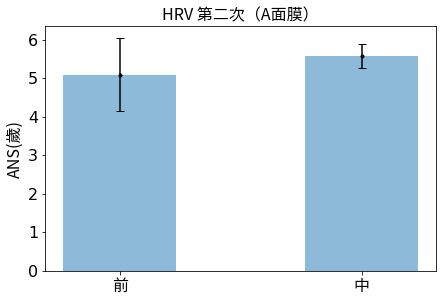

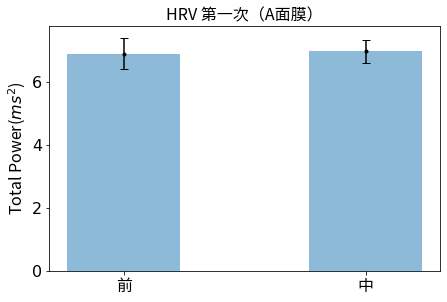

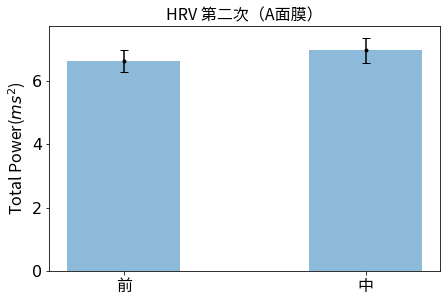

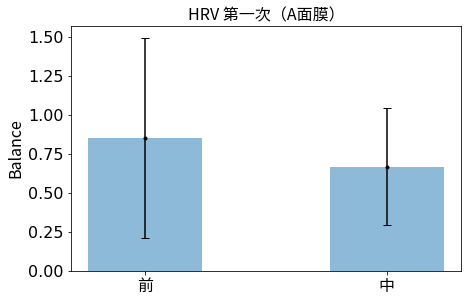

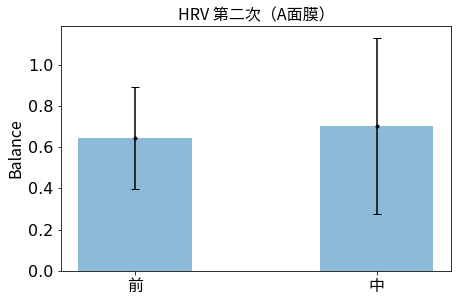

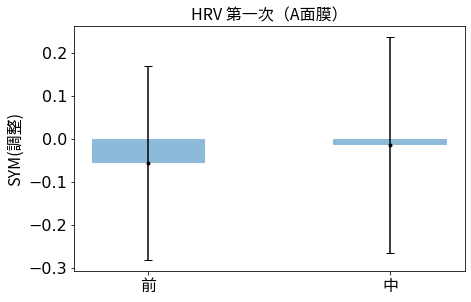

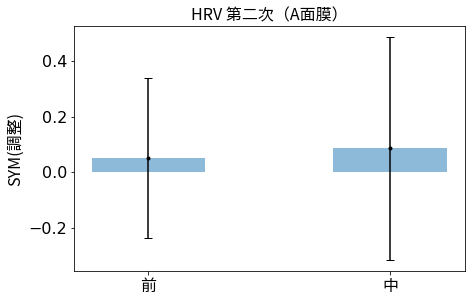

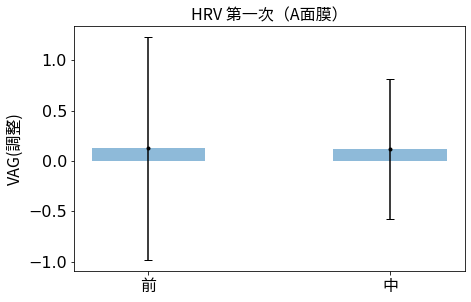

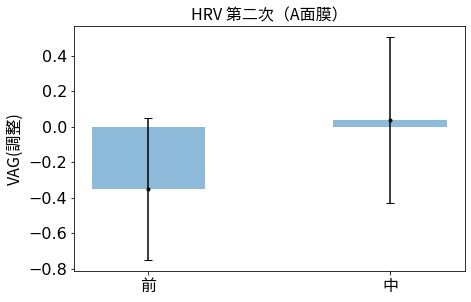

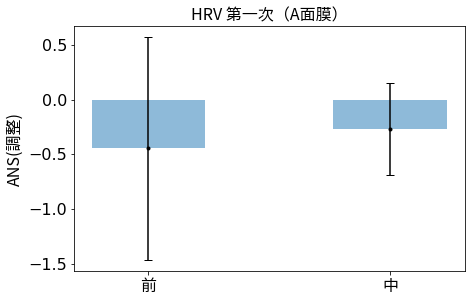

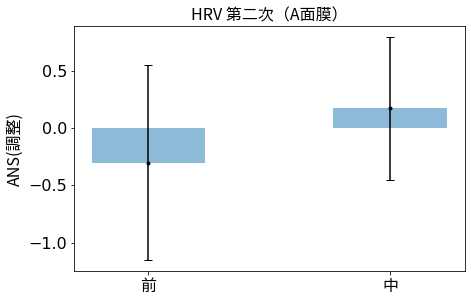

In [138]:
for i in range(8):
    plot2(A_B1_1[i], A_M1_1[i],('前','中'), unit[i], "A", "HRV 第一次", "HRV-1")
    plot2(A_B2_1[i], A_M2_1[i],('前','中'), unit[i], "A", "HRV 第二次", "HRV-2")

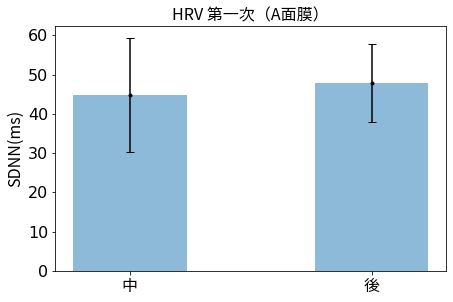

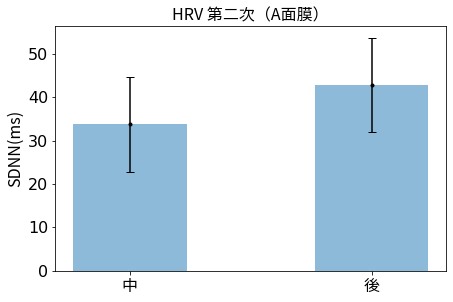

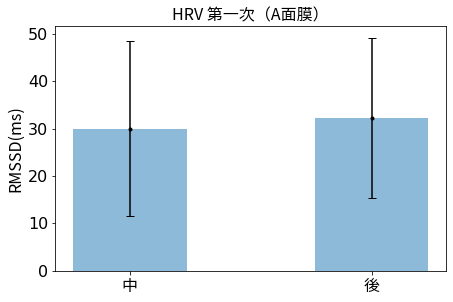

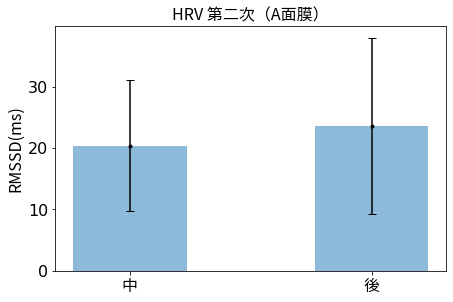

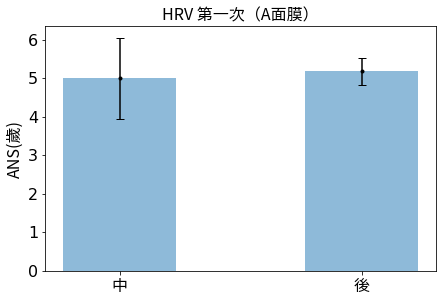

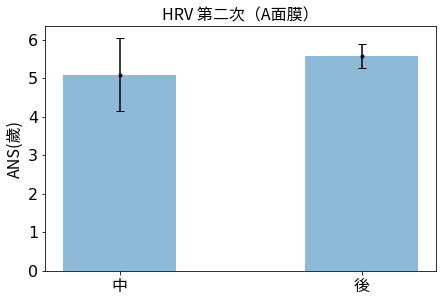

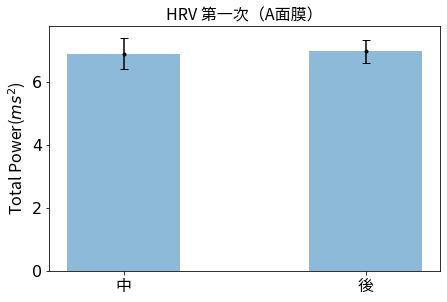

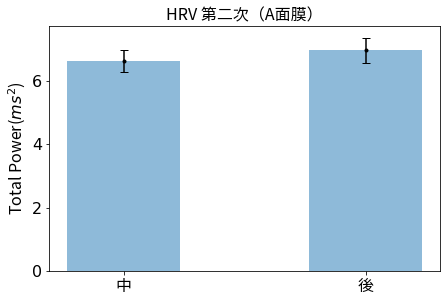

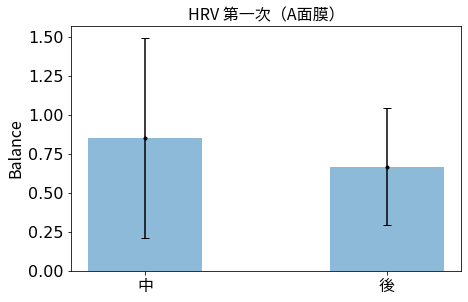

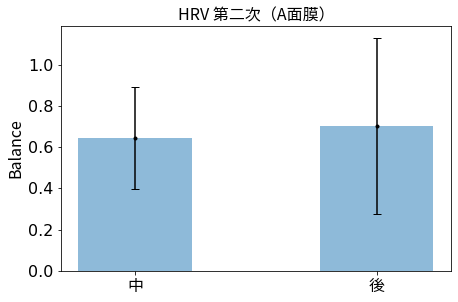

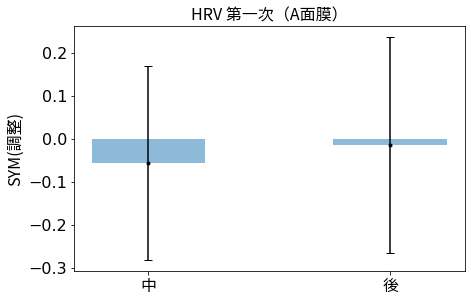

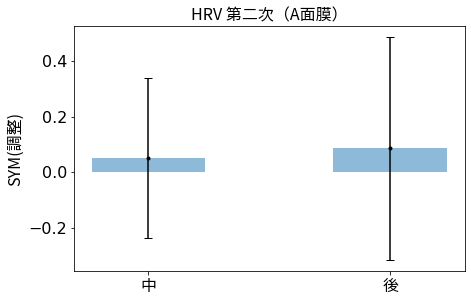

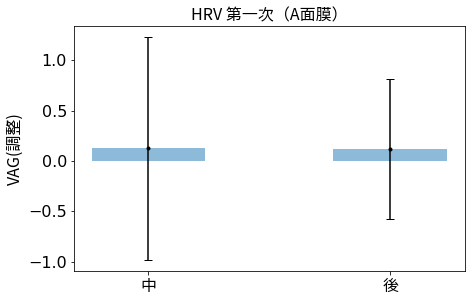

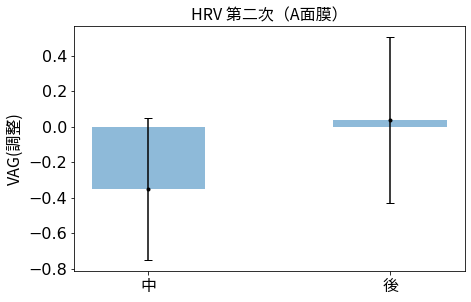

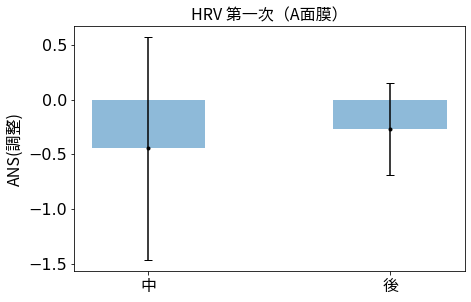

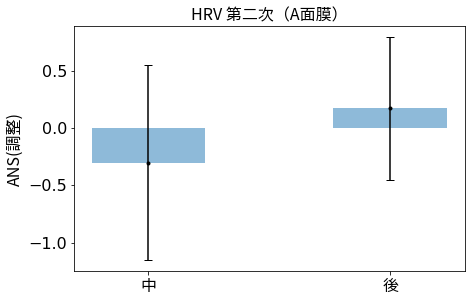

In [139]:
for i in range(8):
    plot2(A_B1_1[i], A_M1_1[i],('中','後'), unit[i], "A", "HRV 第一次", "HRV-3")
    plot2(A_B2_1[i], A_M2_1[i],('中','後'), unit[i], "A", "HRV 第二次", "HRV-4")

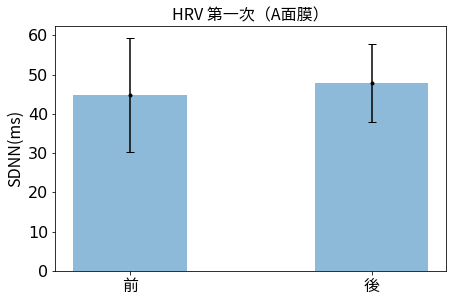

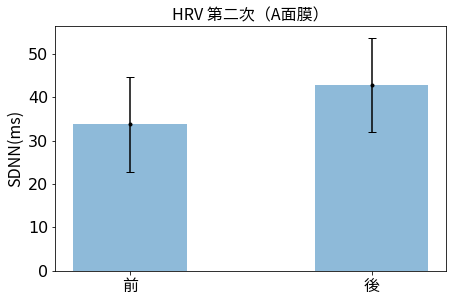

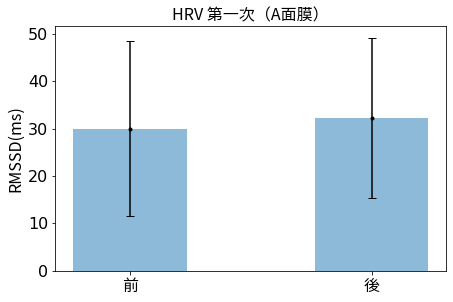

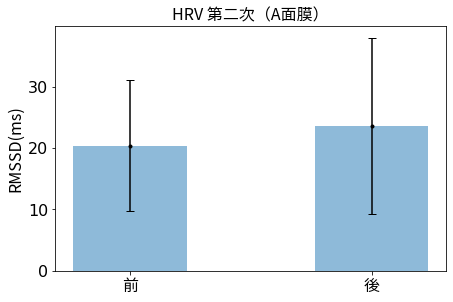

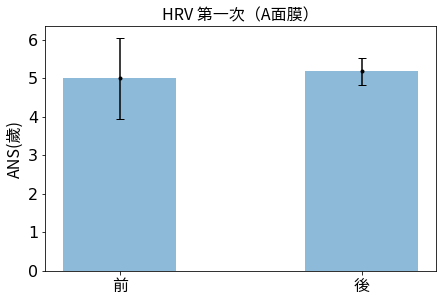

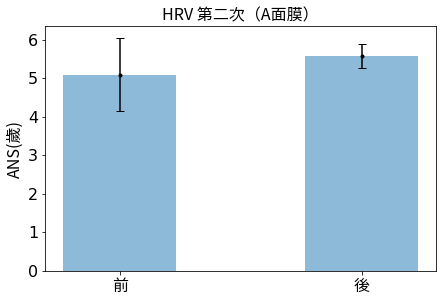

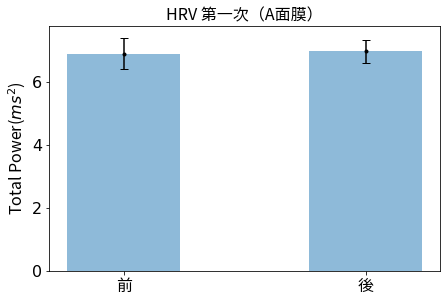

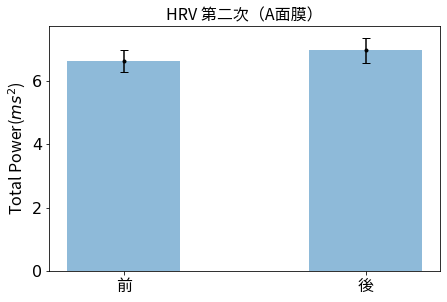

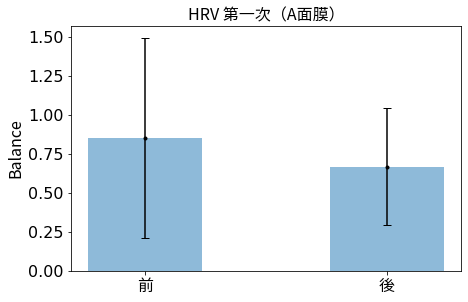

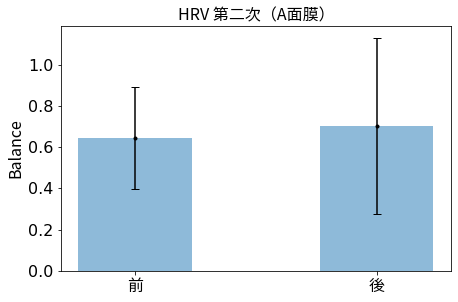

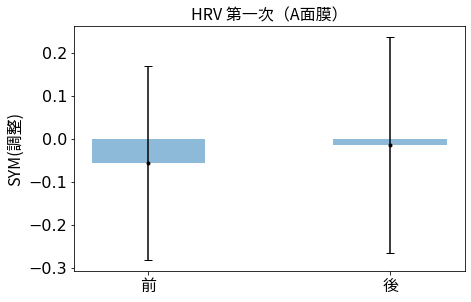

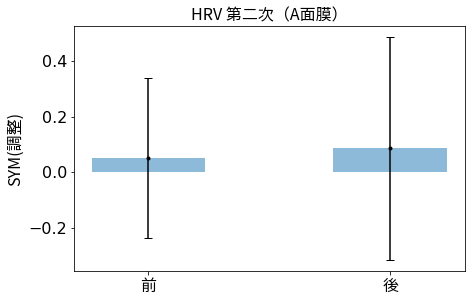

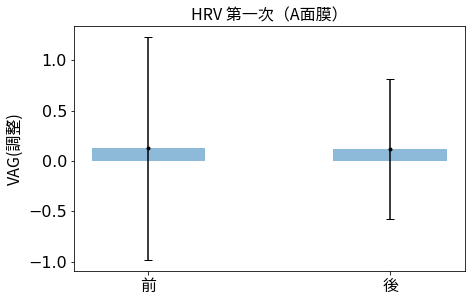

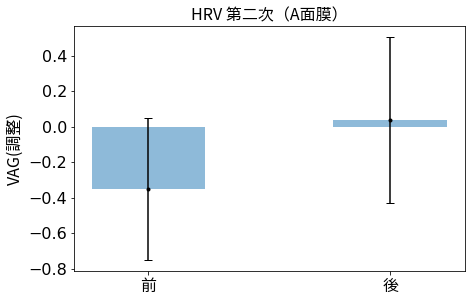

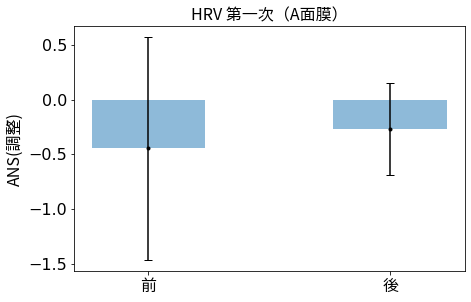

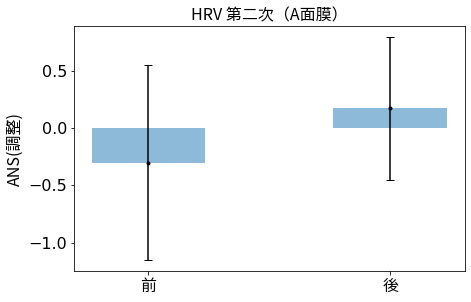

In [140]:
for i in range(8):
    plot2(A_B1_1[i], A_M1_1[i],('前','後'), unit[i], "A", "HRV 第一次", "HRV-5")
    plot2(A_B2_1[i], A_M2_1[i],('前','後'), unit[i], "A", "HRV 第二次", "HRV-6")

In [141]:
def plot_total2(y, text, save):
    font1 = font(fname= "/Users/jielinglee/Downloads/TaipeiSansTCBeta-Regular.ttf")
    plt.rcParams['font.size']=20

    objects = ('前','中','後')
    
 
    plt.figure(figsize=(8, 4.5))
    y_pos = (0.5, 2.5, 4.5)

    plt.title(text, fontproperties=font1)
    plt.plot(y_pos, y, 'o-', color='red', alpha= 0.5)
    plt.boxplot([y[0], y[1], y[2]], positions= y_pos, sym='')
    plt.ylabel('', fontproperties=font1)
    plt.xlim(0,5)
    plt.xticks(y_pos, objects, fontproperties=font1)
    plt.savefig(save+".png")
    plt.show()


C面膜

比較前和中
SDNN
第一次： Paired T-test Results
TtestResult(statistic=-1.93473452879003, pvalue=0.11081589982140165, df=5)
第二次： Paired T-test Results
TtestResult(statistic=-1.2317134514657393, pvalue=0.28551578029409896, df=4)

RMSSD
第一次： Paired T-test Results
TtestResult(statistic=1.1556560209907172, pvalue=0.30004154100022956, df=5)
第二次： Paired T-test Results
TtestResult(statistic=-1.2004900959975617, pvalue=0.296181029336144, df=4)

ANS
第一次： Paired T-test Results
TtestResult(statistic=1.368551009433379, pvalue=0.2294256824045587, df=5)
第二次： Paired T-test Results
TtestResult(statistic=0.4458544424732421, pvalue=0.6787714661891912, df=4)

TP
第一次： Paired T-test Results
TtestResult(statistic=0.16011284255584549, pvalue=0.8790596406503319, df=5)
第二次： Paired T-test Results
TtestResult(statistic=-1.1626753244019683, pvalue=0.30959893111884407, df=4)

Balance
第一次： Paired T-test Results
TtestResult(statistic=0.2947918350815586, pvalue=0.7800005255221125, df=5)
第二次： Paired T-test Results
TtestResu

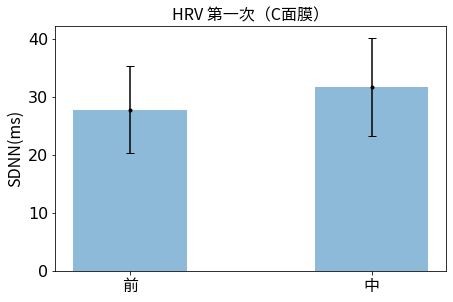

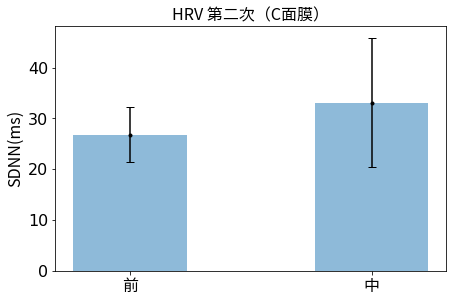

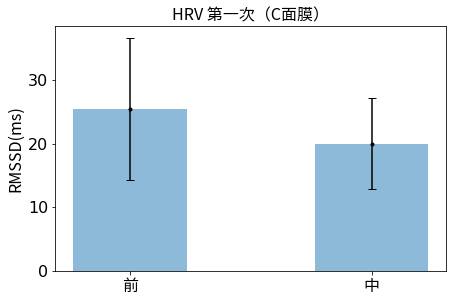

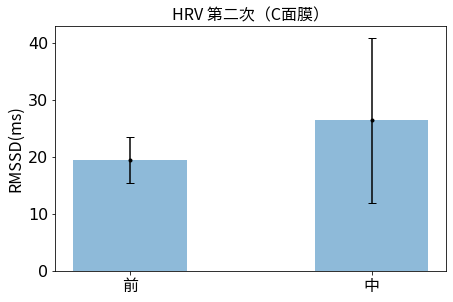

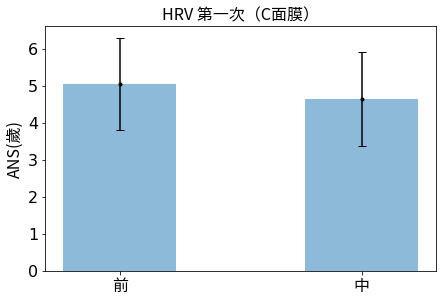

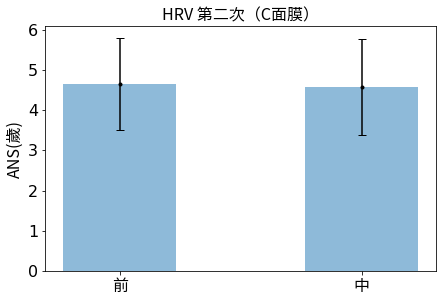

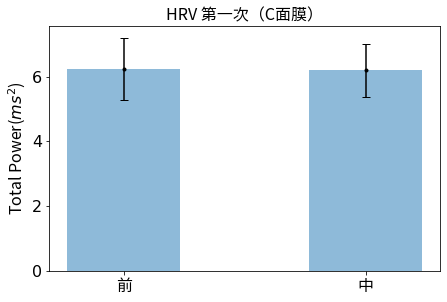

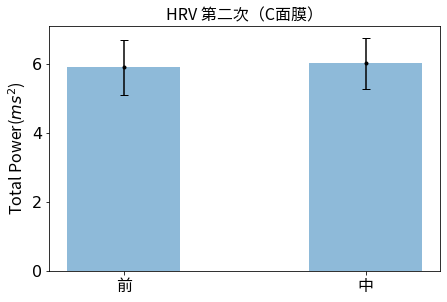

In [142]:
print('C面膜')
print('')
# 5,6,5,5
print('比較前和中')
C_B1_1, C_M1_1, C_B2_1, C_M2_1= result2(item2, 8, 6, 5, data_HRV[12][2:], data_HRV[13][2:], data_HRV[16][2:], data_HRV[17][2:], [6,6,5,5])
print('')

for i in range(4):
    plot2(C_B1_1[i], C_M1_1[i],('前','中'), unit[i], "C", "HRV 第一次", "HRV-1")
    plot2(C_B2_1[i], C_M2_1[i],('前','中'), unit[i], "C", "HRV 第二次", "HRV-2")

比較中和後
SDNN
第一次： Paired T-test Results
TtestResult(statistic=-1.6849235396755178, pvalue=0.15281834900878394, df=5)
第二次： Paired T-test Results
TtestResult(statistic=-0.3306813878745958, pvalue=0.757481404980398, df=4)

RMSSD
第一次： Paired T-test Results
TtestResult(statistic=0.4596385597769217, pvalue=0.6650694104142119, df=5)
第二次： Paired T-test Results
TtestResult(statistic=-0.08821621827824619, pvalue=0.9339448844247209, df=4)

ANS
第一次： Paired T-test Results
TtestResult(statistic=-2.6350267139330783, pvalue=0.046252317010167854, df=5)
第二次： Paired T-test Results
TtestResult(statistic=-0.1633909790703539, pvalue=0.8781335835772907, df=4)

TP
第一次： Paired T-test Results
TtestResult(statistic=-3.039326700022479, pvalue=0.02877289969994604, df=5)
第二次： Paired T-test Results
TtestResult(statistic=0.1358837301902827, pvalue=0.8984773443666816, df=4)

Balance
第一次： Paired T-test Results
TtestResult(statistic=-1.3048143154584135, pvalue=0.24877899732798586, df=5)
第二次： Paired T-test Results
TtestRes

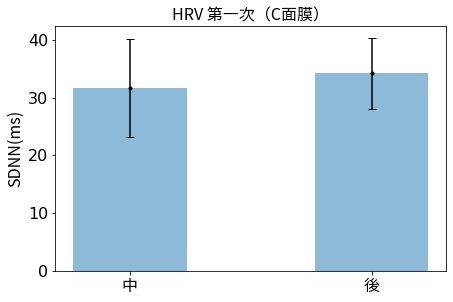

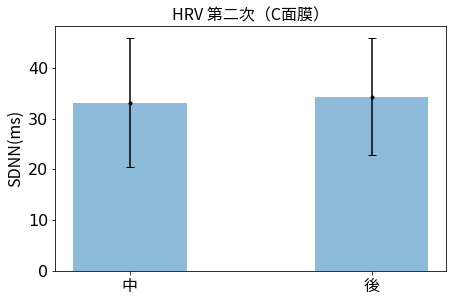

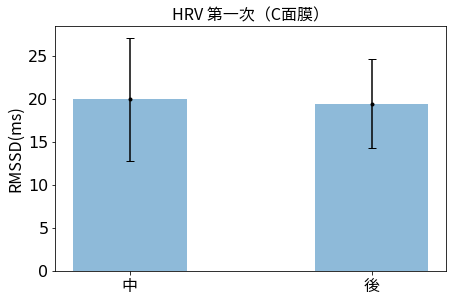

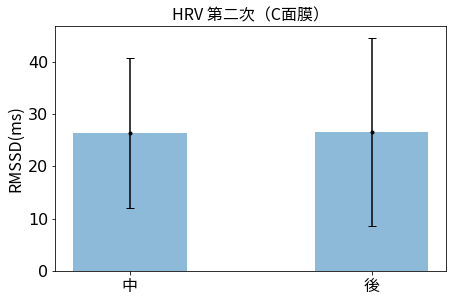

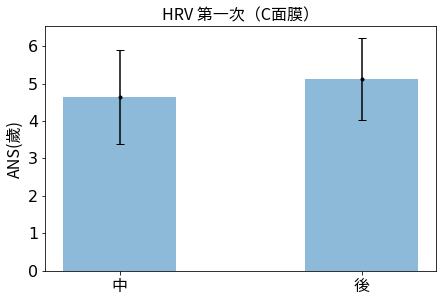

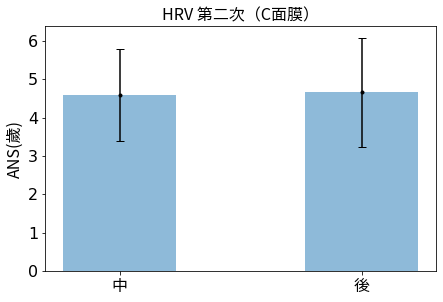

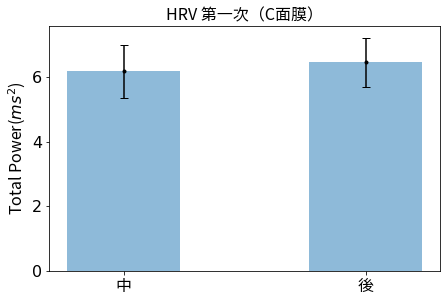

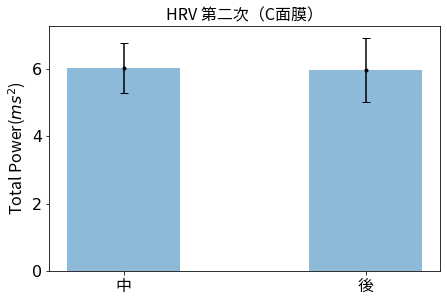

In [143]:
print('比較中和後')
C_M1_2, C_A1_2, C_M2_2, C_A2_2= result2(item2, 8, 6, 5, data_HRV[13][2:], data_HRV[14][2:], data_HRV[17][2:], data_HRV[18][2:], [6,6,5,5])
print('')
for i in range(4):
    plot2(C_M1_2[i], C_A1_2[i],('中','後'), unit[i], "C", "HRV 第一次", "HRV-3")
    plot2(C_M2_2[i], C_A2_2[i],('中','後'), unit[i], "C", "HRV 第二次", "HRV-4")

比較前和後
SDNN
第一次： Paired T-test Results
TtestResult(statistic=-4.233933211633542, pvalue=0.008217222435605772, df=5)
第二次： Paired T-test Results
TtestResult(statistic=-1.4777060258248278, pvalue=0.2135528085372133, df=4)

RMSSD
第一次： Paired T-test Results
TtestResult(statistic=1.2870282505801536, pvalue=0.25444327124627725, df=5)
第二次： Paired T-test Results
TtestResult(statistic=-0.9626563178367472, pvalue=0.3902343330303706, df=4)

ANS
第一次： Paired T-test Results
TtestResult(statistic=-0.3325031458786823, pvalue=0.7529967417927828, df=5)
第二次： Paired T-test Results
TtestResult(statistic=0.003796251843040615, pvalue=0.9971528196660919, df=4)

TP
第一次： Paired T-test Results
TtestResult(statistic=-1.0364860261822397, pvalue=0.3474781842435393, df=5)
第二次： Paired T-test Results
TtestResult(statistic=-0.1606358348729652, pvalue=0.8801664274009189, df=4)

Balance
第一次： Paired T-test Results
TtestResult(statistic=-0.24938536932030755, pvalue=0.8129837371664894, df=5)
第二次： Paired T-test Results
TtestRe

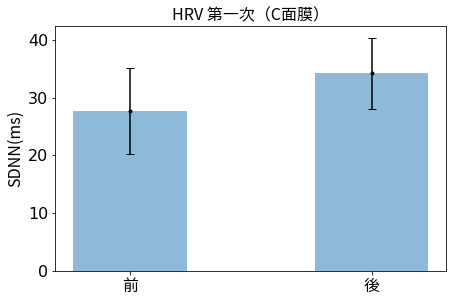

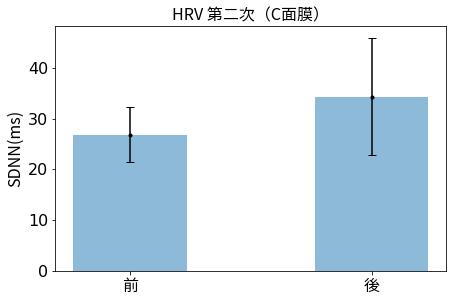

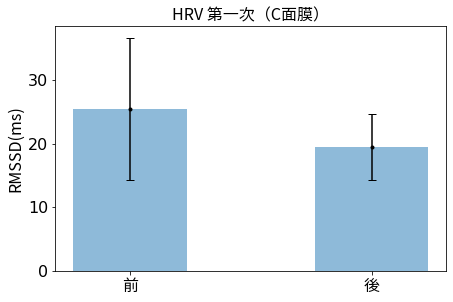

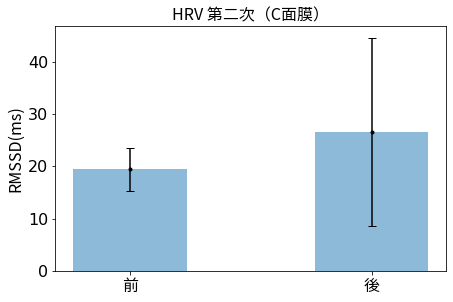

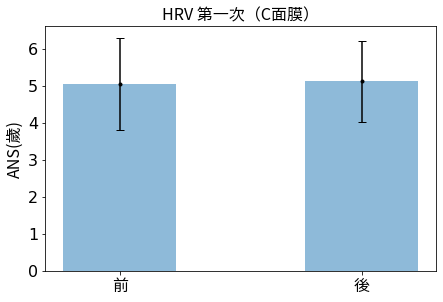

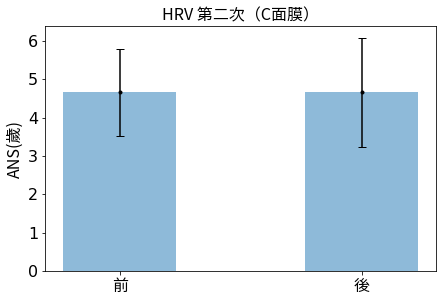

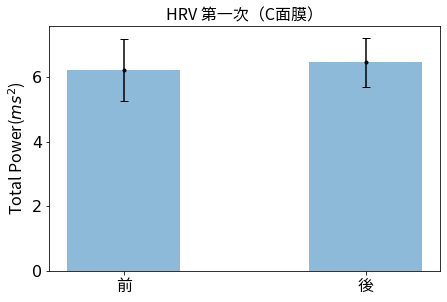

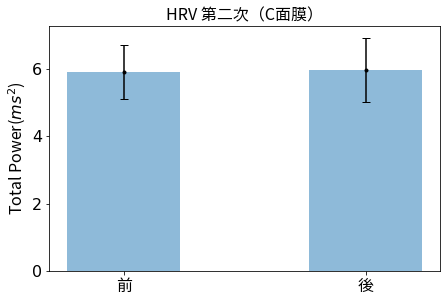

In [144]:
print('比較前和後')
C_B1_3, C_A1_3, C_B2_3, C_A2_3= result2(item2, 8, 6, 5, data_HRV[12][2:], data_HRV[14][2:], data_HRV[16][2:], data_HRV[18][2:], [6,6,5,5])

for i in range(4):
    plot2(C_B1_3[i], C_A1_3[i],('前','後'), unit[i], "C", "HRV 第一次", "HRV-5")
    plot2(C_B2_3[i], C_A2_3[i],('前','後'), unit[i], "C", "HRV 第二次", "HRV-6")

In [145]:
def result3(item, no, t1, t2, Ab, Aa, Cb, Ca):
    A_B= np.zeros((5, 5))
    A_A= np.zeros((5, 5))
    C_B= np.zeros((5, 5))
    C_A= np.zeros((5, 5))
    n=0
    for i in range(no):
        A_before2_1= Ab[0+n:t1+n].astype(float)
        A_after2_1= Aa[0+n:t1+n].astype(float)
        C_before2_1= Cb[0+n:t2+n].astype(float)
        C_after2_1= Ca[0+n:t2+n].astype(float)
        
        A_B[i, :]= A_before2_1
        A_A[i, :]= A_after2_1
        C_B[i, :]= C_before2_1
        C_A[i, :]= C_after2_1
        
        print(item[i])
        print('面膜A： Paired T-test Results')
        result_Ap= stats.ttest_rel(A_before2_1, A_after2_1)
        print(result_Ap)
        print('面膜C： Paired T-test Results')
        result_Cp= stats.ttest_rel(C_before2_1, C_after2_1)
        print(result_Cp)
        print('')

        n+= 8
    return A_B, A_A, C_B, C_A

In [146]:
print('第一次前和第二次後')
A_B1_4, A_A1_4, C_B2_4, C_A2_4= result3(item2, 4, 5, 5, data_HRV[3][2:], data_HRV[8][2:], data_HRV[12][2:], data_HRV[18][2:])

第一次前和第二次後
SDNN
面膜A： Paired T-test Results
TtestResult(statistic=0.16117898594930044, pvalue=0.879765582100132, df=4)
面膜C： Paired T-test Results
TtestResult(statistic=-1.3772574915171982, pvalue=0.2404793852875553, df=4)

RMSSD
面膜A： Paired T-test Results
TtestResult(statistic=0.6070237802074278, pvalue=0.5766045964104635, df=4)
面膜C： Paired T-test Results
TtestResult(statistic=0.1500440244760039, pvalue=0.887991689349794, df=4)

ANS
面膜A： Paired T-test Results
TtestResult(statistic=-1.045350165203839, pvalue=0.3548696943225924, df=4)
面膜C： Paired T-test Results
TtestResult(statistic=2.1080932655896087, pvalue=0.10271106515117308, df=4)

TP
面膜A： Paired T-test Results
TtestResult(statistic=-0.20254539055187643, pvalue=0.8493754633800898, df=4)
面膜C： Paired T-test Results
TtestResult(statistic=1.8141502858352392, pvalue=0.14385158704404977, df=4)



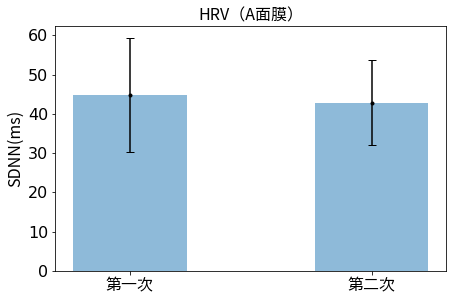

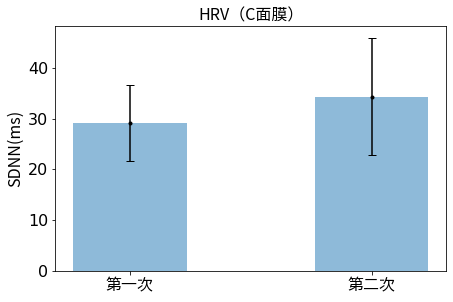

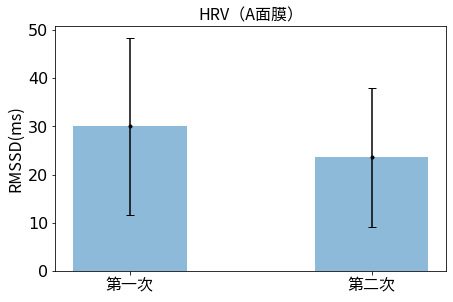

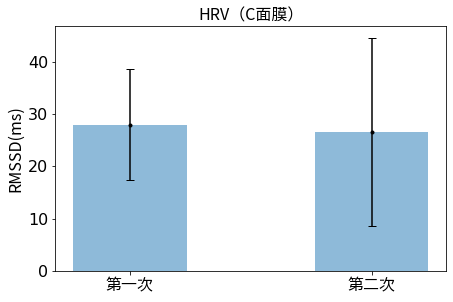

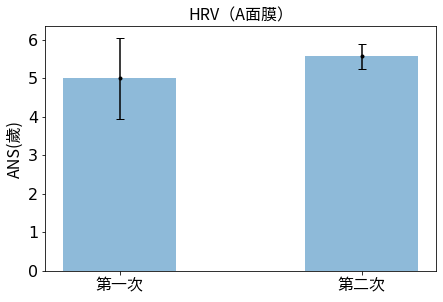

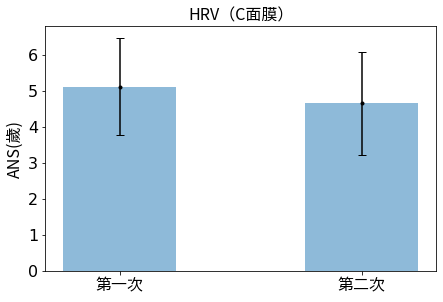

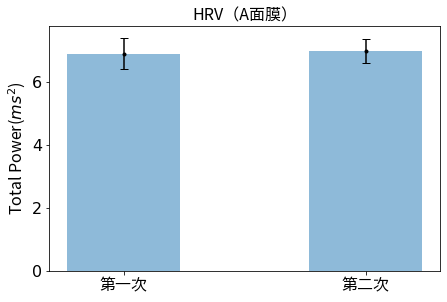

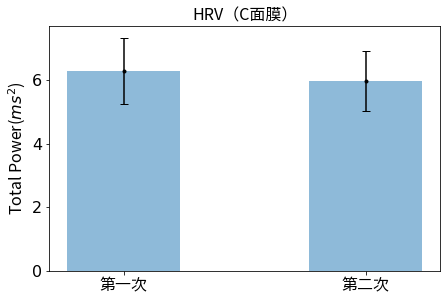

In [147]:
for i in range(4):
    plot2(A_B1_4[i], A_A1_4[i],('第一次','第二次'), unit[i], "A", "HRV", "HRV-7")
    plot2(C_B2_4[i], C_A2_4[i],('第一次','第二次'), unit[i], "C", "HRV", "HRV-8")

In [200]:
def plot_HRV(B1, M1, A1, B2, M2, A2, text, unit):
    font1 = font(fname= "/Users/jielinglee/Downloads/TaipeiSansTCBeta-Regular.ttf")
    plt.rcParams['font.size']=16

    objects1=('第一次（前）', '第一次（中）', '第一次（後）')
    objects2= ('第二次（前）', '第二次（中）', '第二次（後）')
    y1= [np.mean(B1), np.mean(M1), np.mean(A1)]
    y2= [np.mean(B2), np.mean(M2), np.mean(A2)]

    y_pos1 = (1, 1.5, 2)
    y_pos2= (2.5, 3, 3.5)

    yerr1= [np.std(B1), np.std(M1), np.std(A1)]
    yerr2= [np.std(B2), np.std(M2), np.std(A2)]

    fig, ax = plt.subplots(figsize = (8, 5))
    ax.set_title('HRV比較（'+text+'面膜）', fontproperties=font1)
    ax.bar(y_pos1, y1, width = 0.3, align='center', alpha=0.5, color='#FFB703')
    
    ax.bar(y_pos2, y2, width = 0.3, align='center', alpha=0.5, color='#219EBC')
    ax.errorbar(y_pos1, y1, yerr=yerr1, fmt=".", color="black", capsize=4)
    ax.errorbar(y_pos2, y2, yerr=yerr2, fmt=".", color="black", capsize=4)
    ax.set_ylabel(unit, fontproperties=font1)
    ax.set_xticks(y_pos1+y_pos2, objects1+objects2, fontproperties=font1, rotation=15)
    
    plt.savefig("HRV_all" +str(i)+ text+".png")
    plt.show()

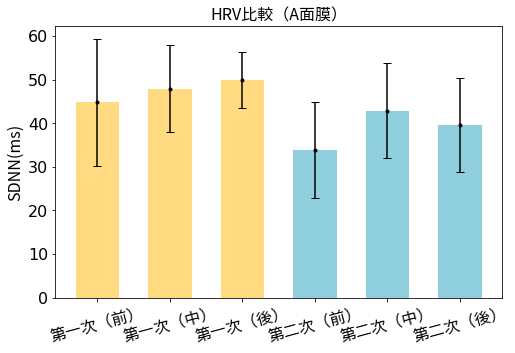

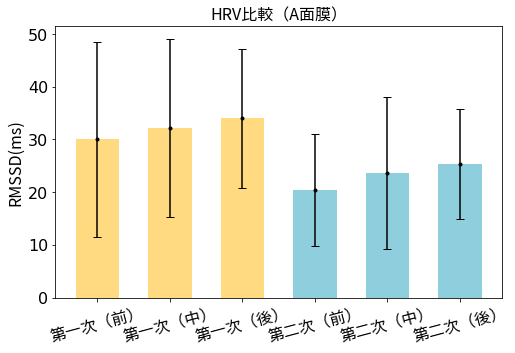

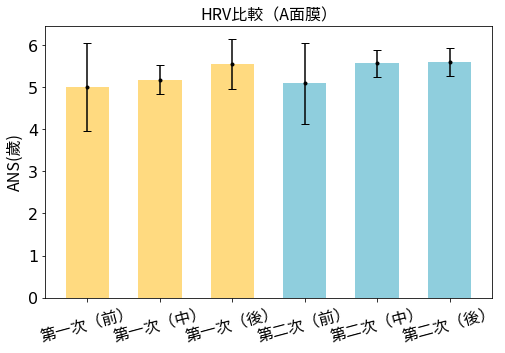

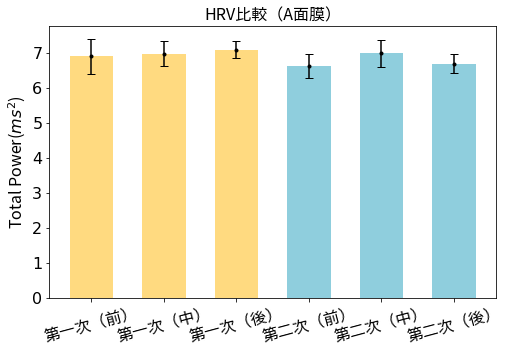

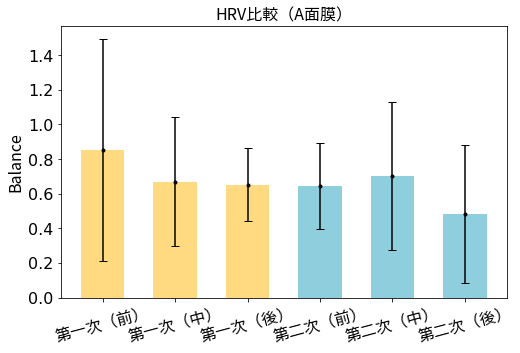

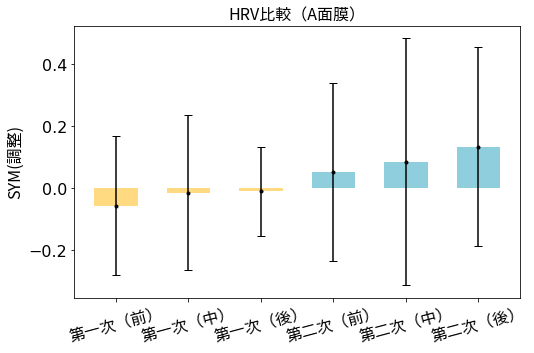

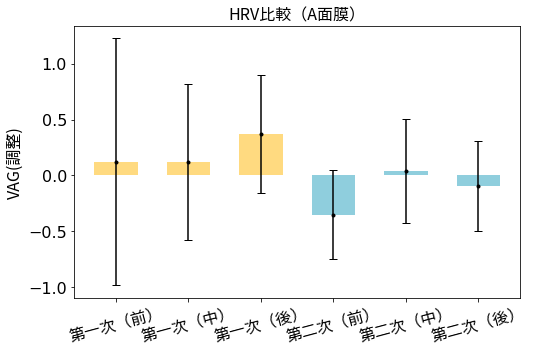

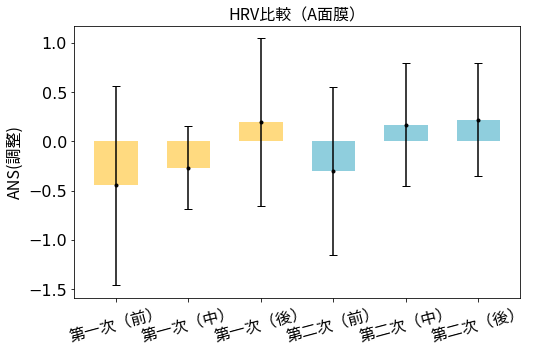

In [201]:
for i in range(8):
    plot_HRV(A_B1_1[i], A_M1_1[i], A_A1_2[i], A_B2_1[i], A_M2_1[i], A_A2_2[i], 'A', unit[i])

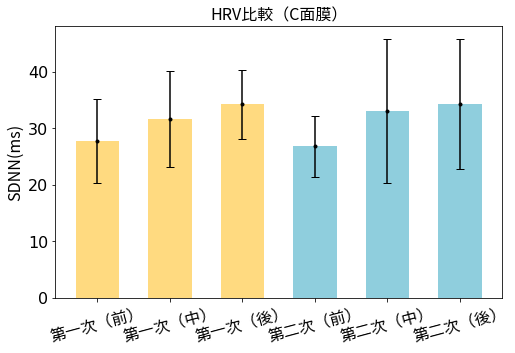

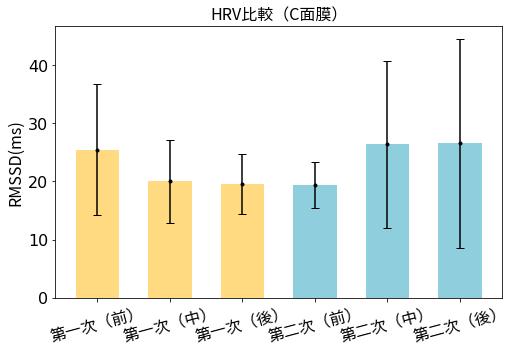

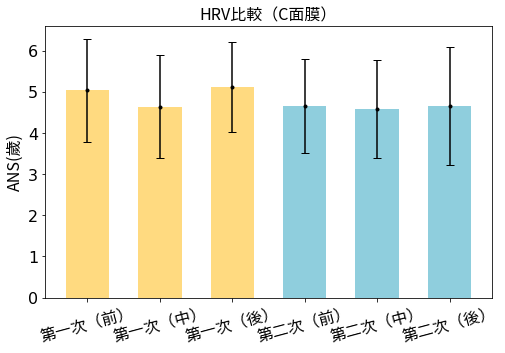

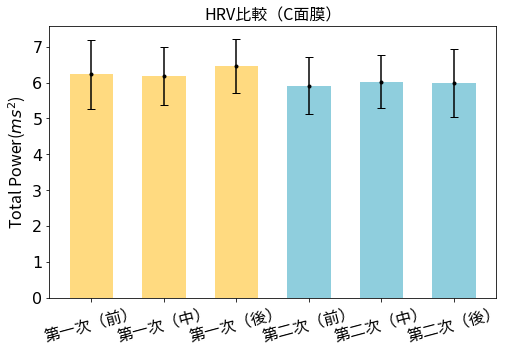

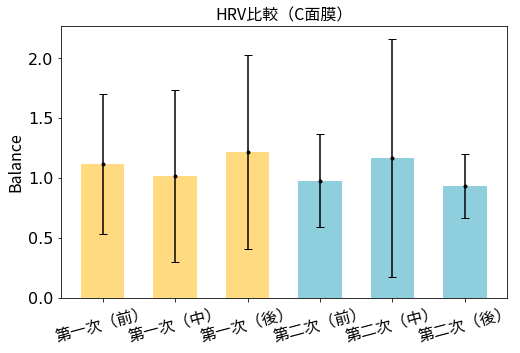

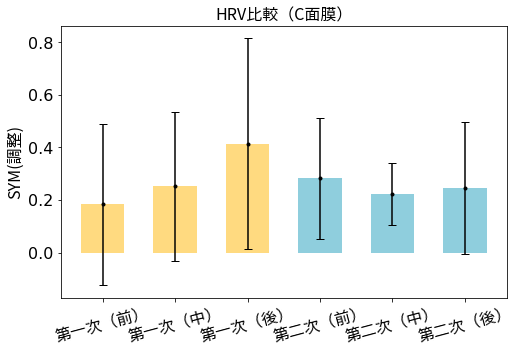

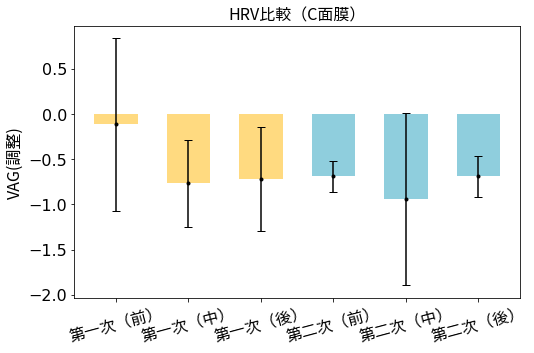

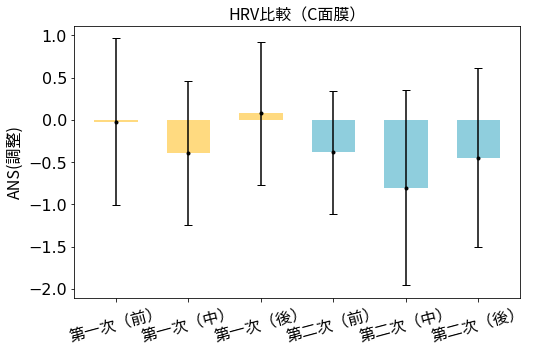

In [202]:
for i in range(8):
    plot_HRV(C_B1_1[i], C_M1_1[i], C_A1_2[i], C_B2_1[i], C_M2_1[i], C_A2_2[i], 'C', unit[i])